In [868]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, metrics, svm
from sklearn.ensemble import RandomForestClassifier
import os
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier

In [869]:

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_data = pd.read_csv('gender_submission.csv')

In [870]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [871]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [872]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [873]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [874]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


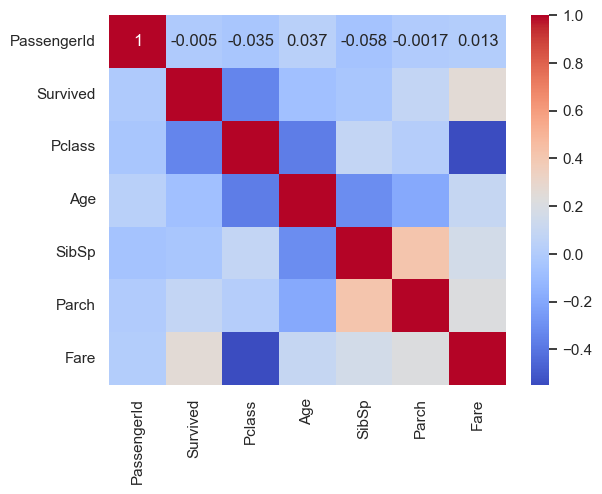

In [875]:

numeric_columns = train_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


<Axes: >

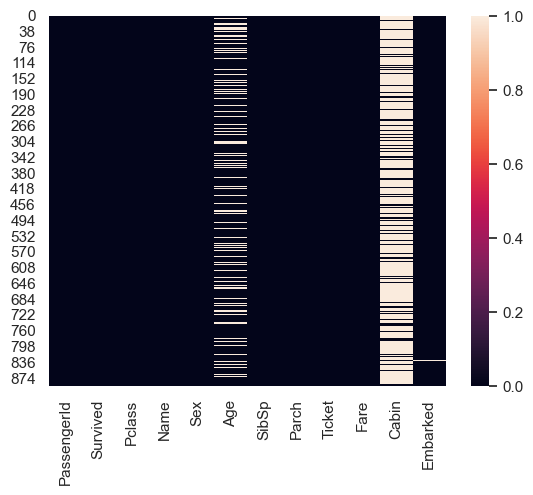

In [876]:
sns.heatmap(train_data.isna())


In [877]:
(test_data['Age'].isna().sum()/len(test_data['Age']))*100

20.574162679425836

In [878]:
(test_data['Cabin'].isna().sum()/len(test_data['Cabin']))*100

78.22966507177034

In [879]:
# Missing Values

median = test_data['Age'].median()
test_data['Age'].fillna(median, inplace=True)
medianage = train_data['Age'].median()
train_data['Age'].fillna(medianage, inplace=True)

medianfare = test_data['Fare'].median()
test_data['Fare'].fillna(medianfare, inplace=True)

In [880]:
median

27.0

In [881]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Survived', ylabel='count'>

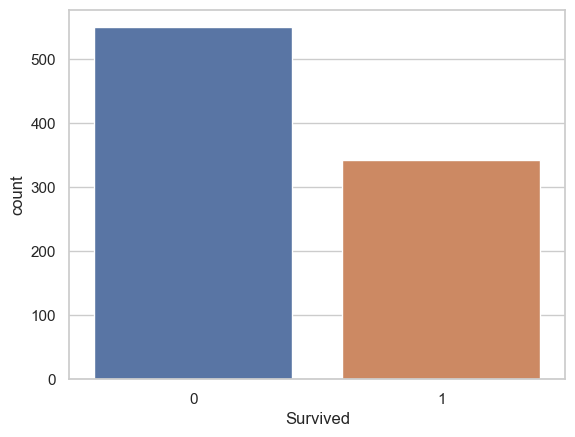

In [882]:
sns.countplot(x='Survived', data=train_data)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

<Axes: xlabel='Survived', ylabel='count'>

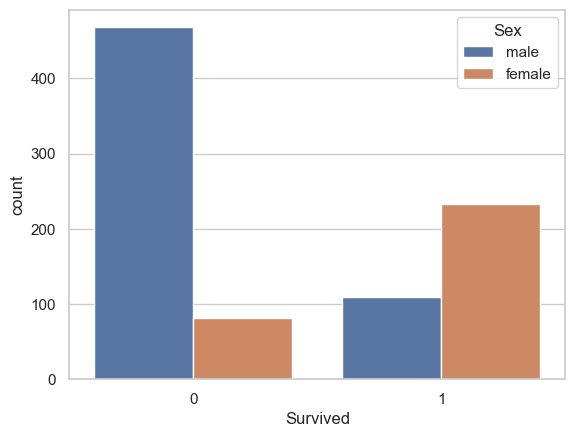

In [883]:
sns.countplot(x='Survived',data=train_data,hue='Sex')

In [884]:
train_data['Pclass'].value_counts(dropna=False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Pclass', ylabel='count'>

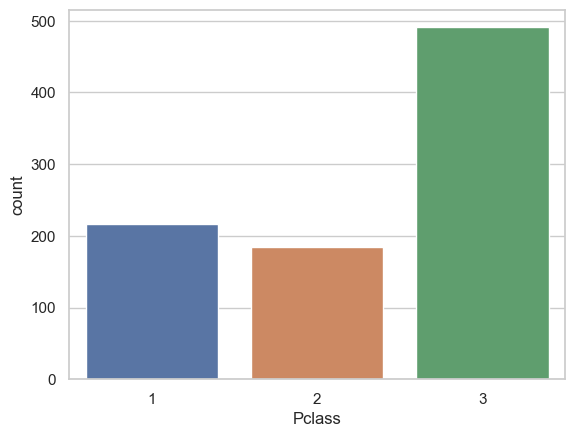

In [885]:
sns.countplot(x='Pclass',data=train_data)

In [886]:
"""
train_data['Survived'] = train_data['Survived'].astype('category')
train_data['Pclass'] = train_data['Pclass'].astype(int)
sns.countplot(x='Survived',data=train_data,hue='Pclass')
"""


"\ntrain_data['Survived'] = train_data['Survived'].astype('category')\ntrain_data['Pclass'] = train_data['Pclass'].astype(int)\nsns.countplot(x='Survived',data=train_data,hue='Pclass')\n"

In [887]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


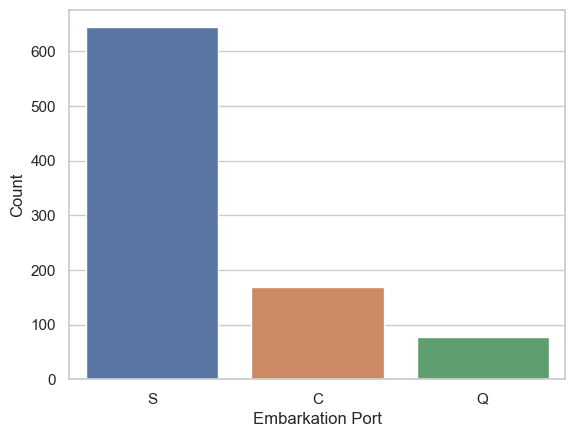

In [888]:

sns.countplot(x='Embarked', data=train_data)

plt.xlabel('Embarkation Port')
plt.ylabel('Count')

# Show the plot
plt.show()


In [889]:
train_data.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)


In [890]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [891]:
label_encoder = preprocessing.LabelEncoder()

train_data['Gender'] = label_encoder.fit_transform(train_data['Sex'])

test_data['Gender'] = label_encoder.fit_transform(test_data['Sex'])

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


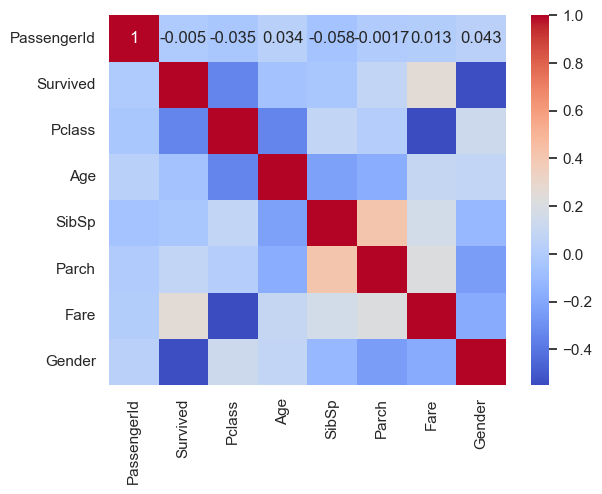

In [892]:
numeric_columns = train_data.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


In [893]:
train_data.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)
test_data.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)
train_data.head()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [894]:
bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'high']
train_data['Fare_Cat'] = pd.cut(train_data["Fare"], bins = bins, labels = labels)

In [895]:
train_data['Fare_Cat']

0             low
1            high
2      medium-low
3            high
4      medium-low
          ...    
886    medium-low
887        medium
888        medium
889        medium
890           low
Name: Fare_Cat, Length: 891, dtype: category
Categories (4, object): ['low' < 'medium-low' < 'medium' < 'high']

In [896]:
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
train_data['Age_Cat'] = pd.cut(train_data['Age'], bins = bins, labels=labels)

In [897]:
pd.DataFrame(train_data['Age_Cat'].value_counts())

,count
Age_Cat,
Adult,526
Young,188
Kid,69
Old,64
Infant,44


In [898]:
#train_data.fillna({'Embarked' : 'S'})

In [899]:

train_data[['Pclass', 'Survived']].groupby(['Pclass']).sum().sort_values(by='Survived')

,Survived
Pclass,
2,87
3,119
1,136


# Logistic Regression



In [900]:
test_data.insert(1,'Survived',gender_data['Survived'])

x_train = train_data [['Pclass', 'Age', 'Fare', 'Gender']]
y_train = train_data['Survived']

x_test = test_data [['Pclass', 'Age', 'Fare', 'Gender']]
y_test = test_data['Survived']




In [901]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Gender       418 non-null    int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 24.6 KB


In [902]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Age          891 non-null    float64 
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Fare         891 non-null    float64 
 7   Gender       891 non-null    int32   
 8   Fare_Cat     891 non-null    category
 9   Age_Cat      891 non-null    category
dtypes: category(2), float64(2), int32(1), int64(5)
memory usage: 54.5 KB


In [903]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [904]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [905]:
y_predlr = lr.predict(x_test)
y_predlr

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [906]:
print('Accuracy:', metrics.accuracy_score(y_test, y_predlr))

Accuracy: 0.9425837320574163


# Decision Tree



In [907]:

clf = DecisionTreeClassifier(random_state=42)

clf.fit(x_train, y_train)

y_predtree = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_predtree)
print(f"Accuracy: {accuracy:.2f}")

new_passenger = pd.DataFrame({
    'Pclass': [1],     
    'Age': [30],       
    'Fare': [50],    
    'Gender': [1]   
})

prediction = clf.predict(new_passenger)
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Not Survived'}")


Accuracy: 0.79
Predicted Survival: Not Survived


In [908]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(x_train, y_train)

y_predtree = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_predtree)
print(f"Accuracy: {accuracy:.2f}")

new_passenger = pd.DataFrame({
    'Pclass': [2],     
    'Age': [30],       
    'Fare': [50],    
    'Gender': [1]   
})

prediction = clf.predict(new_passenger)
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Not Survived'}")

Accuracy: 0.79
Predicted Survival: Not Survived


In [909]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(x_train, y_train)

y_predtree = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_predtree)
print(f"Accuracy: {accuracy:.2f}")

new_passenger = pd.DataFrame({
    'Pclass': [3],     
    'Age': [30],       
    'Fare': [50],    
    'Gender': [0]   
})

prediction = clf.predict(new_passenger)
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Not Survived'}")

Accuracy: 0.79
Predicted Survival: Not Survived


In [914]:
decision_tree_gini = DecisionTreeClassifier()

decision_tree_entropy = DecisionTreeClassifier(criterion='entropy')

decision_tree_depth = DecisionTreeClassifier(max_depth=3)

In [915]:
decision_tree_gini.fit(x_train, y_train)
decision_tree_entropy.fit(x_train, y_train)
decision_tree_depth.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [916]:
y_pred_gini = decision_tree_gini.predict(x_test)
y_pred_entropy = decision_tree_entropy.predict(x_test)
y_pred_depth = decision_tree_depth.predict(x_test)

In [917]:
print('Accuracy (gini):', metrics.accuracy_score(y_test, y_pred_gini))
print('Accuracy (entropy):', metrics.accuracy_score(y_test, y_pred_entropy))
print('Accuracy (Max depth):', metrics.accuracy_score(y_test, y_pred_depth))

Accuracy (gini): 0.784688995215311
Accuracy (entropy): 0.7488038277511961
Accuracy (Max depth): 0.9760765550239234


# K-Nearest Neighbors



In [910]:
knn_model= KNeighborsClassifier(n_neighbors= 3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [911]:
y_predknn = knn_model.predict(x_test)
y_predknn

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [912]:
print('Accuracy:', metrics.accuracy_score(y_test, y_predknn))

Accuracy: 0.583732057416268


# Random Forest

In [913]:
y = train_data["Survived"]

factors = ['PassengerId', 'Pclass', 'Age', 'Fare', 'Gender']
X = pd.get_dummies(train_data[factors])
X_test = pd.get_dummies(test_data[factors])

model = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
model.fit(X, y)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)




Accuracy: 0.83
Confusion Matrix:
[[258   8]
 [ 63  89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       266
           1       0.92      0.59      0.71       152

    accuracy                           0.83       418
   macro avg       0.86      0.78      0.80       418
weighted avg       0.85      0.83      0.82       418



Tensorflow

In [ ]:
features = test_data[['Pclass', 'Age', 'Fare', 'Gender']]
labels = test_data['Survived']


feature_dataset = tf.data.Dataset.from_tensor_slices(dict(features))
label_dataset = tf.data.Dataset.from_tensor_slices(labels)


dataset = tf.data.Dataset.zip((feature_dataset, label_dataset))

